# Enunciado

### Columnas

- **ID**: Identificador único.  

- **RevolvingUtilizationOfUnsecuredLines**: Proporción del límite de crédito utilizado.  

- **Age**: Edad del individuo.  

- **NumberOfTime30-59DaysPastDueNotWorse**: Número de retrasos de pago de 30 a 59 días.

- **DebtRatio**: Ratio deuda-ingreso.

- **MonthlyIncome**: Ingreso mensual.

- **NumberOfOpenCreditLinesAndLoans**: Número de líneas de crédito abiertas y préstamos.

- **NumberOfTimes90DaysLate**: Número de retrasos de pago de 90 días o más.

- **NumberRealEstateLoansOrLines**: Número de préstamos o líneas de crédito respaldados por propiedades inmuebles.

- **NumberOfTime60-89DaysPastDueNotWorse**: Número de retrasos de pago de 60 a 89 días.

- **NumberOfDependents**: Número de dependientes.

- **SeriousDlqin2yrs**: Incumplimiento grave en los últimos 2 años (1 si ocurrió, 0 en caso contrario)

# Bibliotecas

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score

# Leer DataSet

In [214]:
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")

In [215]:
len(data)

105000

In [216]:
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

In [217]:
len(data_test)

45000

## ¿Hay null values?

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84164 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102236 non-null  float64
 11  

## Rellenarlos con la mediana

In [ ]:
data.loc[:, 'MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data.loc[:, 'NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_4796\4117364196.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MonthlyIncome'].fillna(data['MonthlyIncome'].median(), inplace=True)
C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_4796\4117364196.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         105000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    105000 non-null  float64
 11  

In [221]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    45000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  45000 non-null  float64
 2   Age                                   45000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  45000 non-null  int64  
 4   DebtRatio                             45000 non-null  float64
 5   MonthlyIncome                         36105 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       45000 non-null  int64  
 7   NumberOfTimes90DaysLate               45000 non-null  int64  
 8   NumberRealEstateLoansOrLines          45000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  45000 non-null  int64  
 10  NumberOfDependents                    43840 non-null  float64
dtypes: float64(4), 

In [ ]:
data_test.loc[:, 'MonthlyIncome'] = data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].median())
data_test.loc[:, 'NumberOfDependents'] = data_test['NumberOfDependents'].fillna(0)

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_4796\2503196495.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].median(), inplace=True)
C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_4796\2503196495.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [223]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    45000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  45000 non-null  float64
 2   Age                                   45000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  45000 non-null  int64  
 4   DebtRatio                             45000 non-null  float64
 5   MonthlyIncome                         45000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       45000 non-null  int64  
 7   NumberOfTimes90DaysLate               45000 non-null  int64  
 8   NumberRealEstateLoansOrLines          45000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  45000 non-null  int64  
 10  NumberOfDependents                    45000 non-null  float64
dtypes: float64(4), 

Tenemos missing values en ambos

In [224]:
list(data.columns)

['ID',
 'RevolvingUtilizationOfUnsecuredLines',
 'Age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'SeriousDlqin2yrs']

In [225]:
data.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,1.050000e+05,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,75006.458152,5.378324,52.325610,0.409352,352.044192,6.444949e+03,8.459952,0.254619,1.019010,0.228762,0.737981,0.066514
std,43315.742022,201.573457,14.766425,4.056717,1820.229318,1.453363e+04,5.134329,4.032506,1.131065,4.017864,1.107165,0.249180
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37590.750000,0.029974,41.000000,0.000000,0.174950,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74941.500000,0.154252,52.000000,0.000000,0.366061,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112542.500000,0.556035,63.000000,0.000000,0.870083,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149999.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


<Axes: >

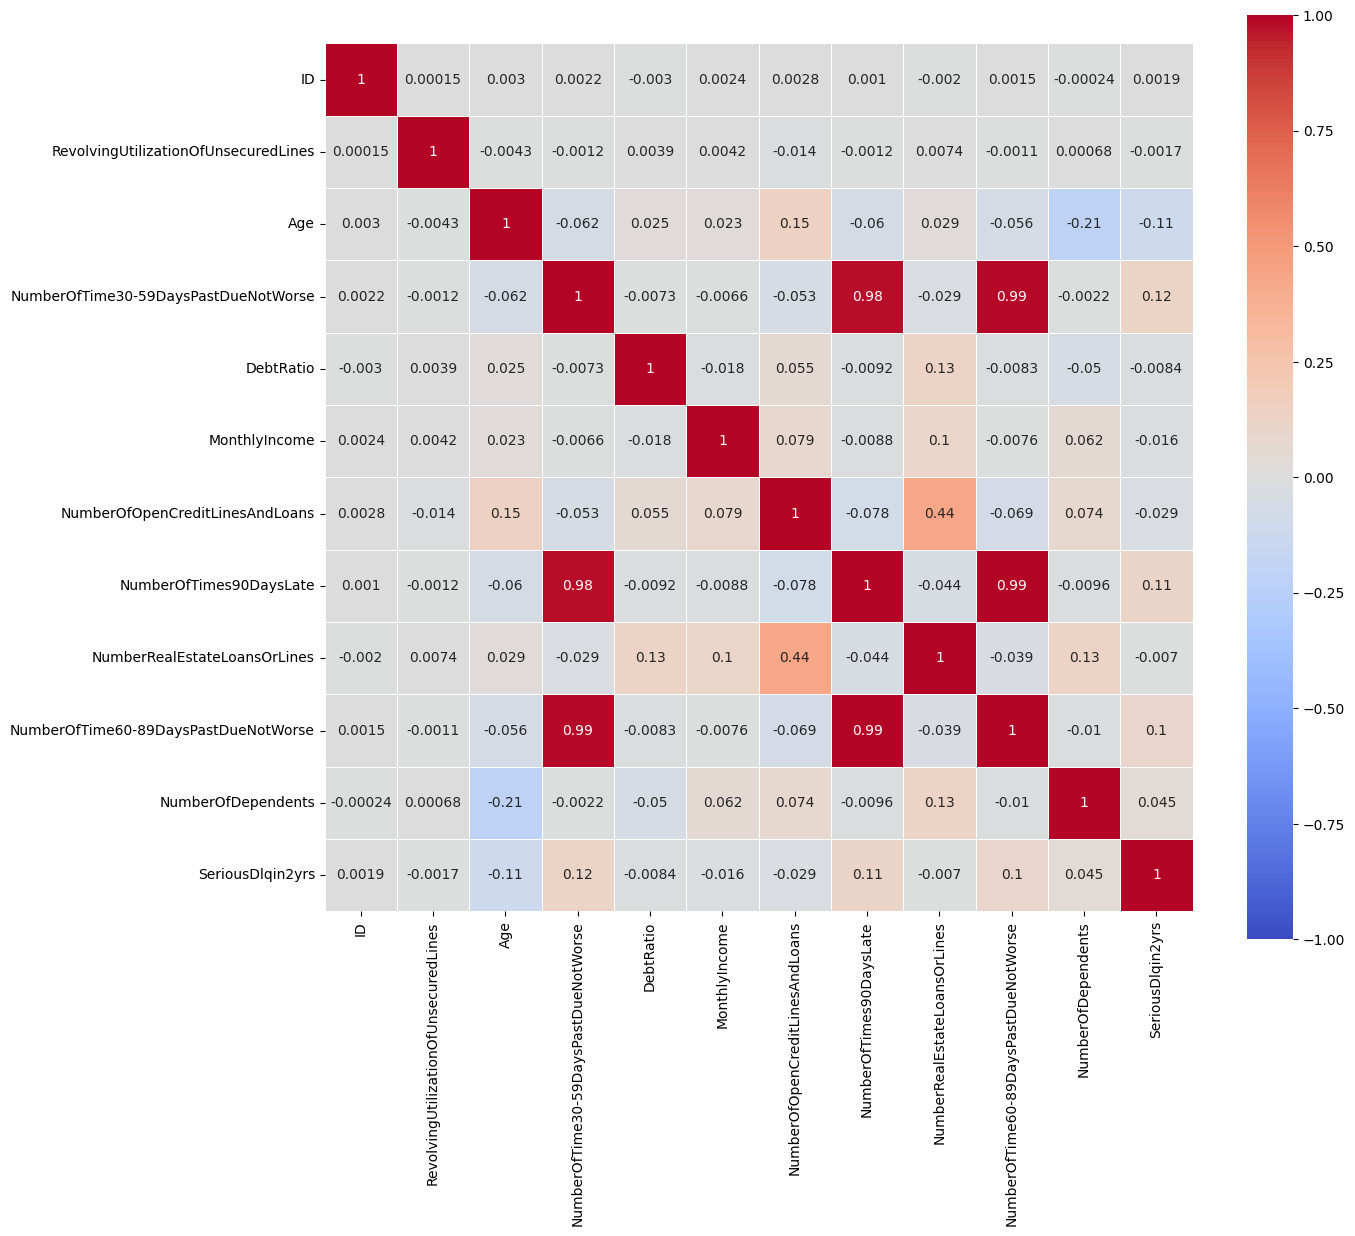

In [226]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), 
            annot=True,           
            cmap="coolwarm",     
            vmin=-1, vmax=1,      
            square=True,          
            linewidths=0.5)

# Modelo 1


In [227]:
X = data[["NumberOfTime60-89DaysPastDueNotWorse","NumberOfTime30-59DaysPastDueNotWorse","NumberOfTimes90DaysLate"]]
y = data["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.6386132006610945


In [228]:
y_pred_proba

array([0.05320748, 0.05320748, 0.05320748, ..., 0.05320748, 0.05320748,
       0.05320748])

In [229]:
X = data_test[["NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate"]]

y_pred_proba_test = model.predict_proba(X)[:, 1] 

predictions_df = pd.DataFrame({"ID": data_test["ID"],
                               "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_1.csv', index=False)



# Modelo 2


In [193]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [194]:
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

data.loc[:, 'MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data.loc[:, 'NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

data_test.loc[:, 'MonthlyIncome'] = data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].median())
data_test.loc[:, 'NumberOfDependents'] = data_test['NumberOfDependents'].fillna(0)

data['HighDebt'] = data['DebtRatio'] > 0.5
data[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'DebtRatio']])

data_test['HighDebt'] = data_test['DebtRatio'] > 0.5
data_test[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data_test[['Age', 'MonthlyIncome', 'DebtRatio']])

print(len(data))
print(len(data_test))

105000
45000


<Axes: >

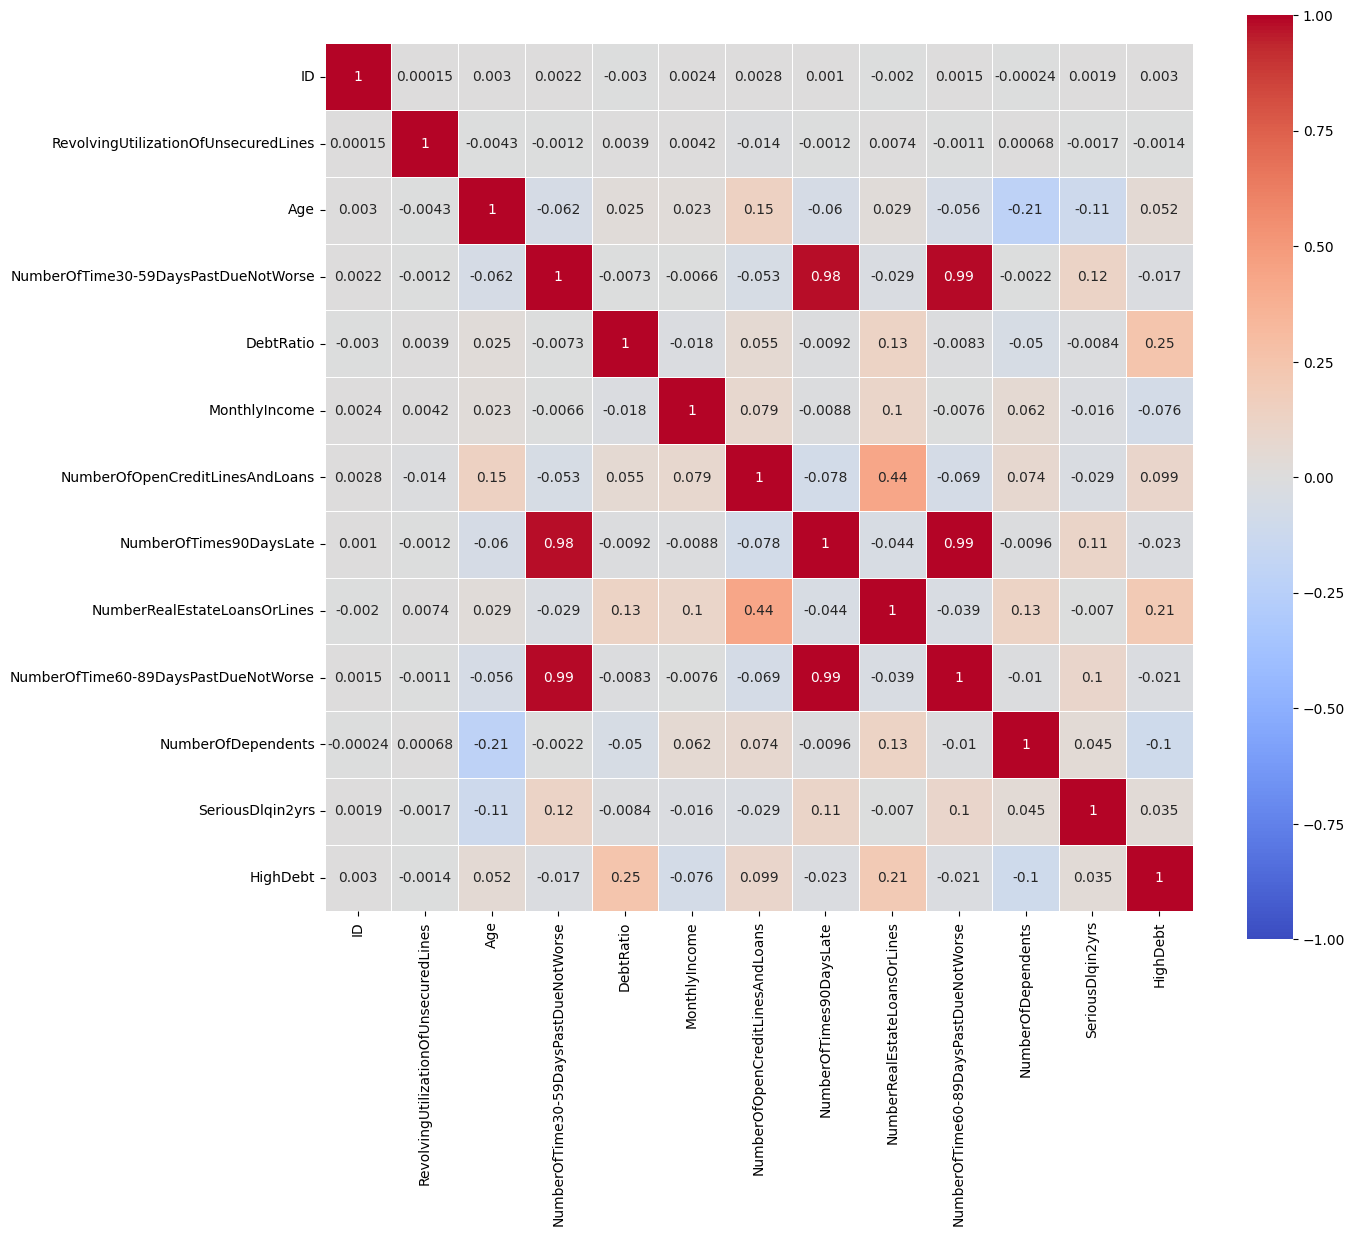

In [195]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), 
            annot=True,           
            cmap="coolwarm",     
            vmin=-1, vmax=1,      
            square=True,          
            linewidths=0.5)

In [196]:
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.6855653035609255


In [198]:
X = data_test.drop(['ID'], axis=1)
y_pred_proba_test = model.predict_proba(X)[:, 1] 

predictions_df = pd.DataFrame({"ID": data_test["ID"],
                               "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_2.csv', index=False)

# Modelo 3


In [199]:
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

data.loc[:, 'MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data.loc[:, 'NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

data_test.loc[:, 'MonthlyIncome'] = data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].median())
data_test.loc[:, 'NumberOfDependents'] = data_test['NumberOfDependents'].fillna(0)

data['HighDebt'] = data['DebtRatio'] > 0.5
data[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'DebtRatio']])

data_test['HighDebt'] = data_test['DebtRatio'] > 0.5
data_test[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data_test[['Age', 'MonthlyIncome', 'DebtRatio']])

print(len(data))
print(len(data_test))

105000
45000


In [201]:
X = data[["DebtRatio","NumberRealEstateLoansOrLines"]]
y = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

X = data_test[["DebtRatio","NumberRealEstateLoansOrLines"]]
y_pred_proba_test = model.predict_proba(X)[:, 1] 

predictions_df = pd.DataFrame({"ID": data_test["ID"],
                               "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_3.csv', index=False)

AUC: 0.5103090594842647


# Modelo 4


In [206]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

In [207]:
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")


data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

data_test['MonthlyIncome'] = data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].median())
data_test['NumberOfDependents'] = data_test['NumberOfDependents'].fillna(0)


data['HighDebt'] = data['DebtRatio'] > 0.5
data_test['HighDebt'] = data_test['DebtRatio'] > 0.5

scaler = StandardScaler()
data[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'DebtRatio']])
data_test[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.transform(data_test[['Age', 'MonthlyIncome', 'DebtRatio']])

In [ ]:
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']


param_dist = {'C': uniform(loc=0, scale=4),         
              'solver': ['lbfgs', 'liblinear'],     
              'penalty': ['l2']}

model = LogisticRegression(max_iter=500)

random_search = RandomizedSearchCV(model, 
                                   param_distributions=param_dist,
                                     n_iter=10,
                                       scoring='roc_auc',
                                         cv=5, 
                                         random_state=42)

random_search.fit(X, y)


print("Mejores hiperparámetros:", random_search.best_params_)
best_model = random_search.best_estimator_


cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"AUC CV Score: {cv_scores.mean():.4f}")


X_test_final = data_test.drop(['ID'], axis=1)
y_pred_proba_test = best_model.predict_proba(X_test_final)[:, 1]


predictions_df = pd.DataFrame({"ID": data_test["ID"],
                               "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_4.csv', index=False)



Mejores hiperparámetros: {'C': np.float64(1.49816047538945), 'penalty': 'l2', 'solver': 'lbfgs'}
AUC CV Score: 0.7018


# Modelo 5


In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from scipy.stats import randint

In [210]:
# Carga de datos y preprocesamiento
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

data_test['MonthlyIncome'] = data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].median())
data_test['NumberOfDependents'] = data_test['NumberOfDependents'].fillna(0)

data['HighDebt'] = data['DebtRatio'] > 0.5
data_test['HighDebt'] = data_test['DebtRatio'] > 0.5

scaler = StandardScaler()
data[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'DebtRatio']])
data_test[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.transform(data_test[['Age', 'MonthlyIncome', 'DebtRatio']])

In [ ]:
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']

# Definición del modelo RandomForest y el espacio de búsqueda
param_dist = {'n_estimators': randint(50, 200),
              'max_depth': randint(3, 15),
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 10),
              'max_features': ['auto', 'sqrt', 'log2']}

# RandomizedSearch con validación cruzada
model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(model, 
                                    param_distributions=param_dist, 
                                    n_iter=10, 
                                    scoring='roc_auc',
                                    cv=5,
                                    random_state=42)

random_search.fit(X, y)

# Mejores parámetros y validación cruzada
print("Mejores hiperparámetros:", random_search.best_params_)
best_model = random_search.best_estimator_

# Cross-Validation AUC Score en los datos de entrenamiento
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"AUC CV Score: {cv_scores.mean():.4f}")

# Predicciones finales en el test set
X_test_final = data_test.drop(['ID'], axis=1)
y_pred_proba_test = best_model.predict_proba(X_test_final)[:, 1]

# Generación de archivo de predicciones
predictions_df = pd.DataFrame({"ID": data_test["ID"],
                                "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_5.csv', index=False)

c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Jjaavviieerroperro\AppData\Local\Program

Mejores hiperparámetros: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 124}
AUC CV Score: 0.8620


# Modelo 6


In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.impute import KNNImputer

In [239]:
# Carga de datos y preprocesamiento
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

imputer = KNNImputer(n_neighbors=5)

data['MonthlyIncome'] = imputer.fit_transform(data[["MonthlyIncome"]])
data['NumberOfDependents'] = imputer.fit_transform(data[["NumberOfDependents"]])

data_test['MonthlyIncome'] = imputer.fit_transform(data_test[["MonthlyIncome"]])
data_test['NumberOfDependents'] = imputer.fit_transform(data_test[["NumberOfDependents"]])

data['HighDebt'] = data['DebtRatio'] > 0.5
data_test['HighDebt'] = data_test['DebtRatio'] > 0.5

scaler = StandardScaler()
data[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'DebtRatio']])
data_test[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.transform(data_test[['Age', 'MonthlyIncome', 'DebtRatio']])

In [ ]:
# Separación de variables predictoras y variable objetivo
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']

# Definición del modelo con los mejores hiperparámetros
model = RandomForestClassifier(n_estimators=124, max_depth=9, min_samples_split=8, 
                               min_samples_leaf=3, max_features='sqrt', random_state=42)

# Entrenamiento del modelo
model.fit(X, y)

# Predicciones y cálculo de AUC en el conjunto de entrenamiento
y_pred_proba_train = model.predict_proba(X)[:, 1]
auc_train = roc_auc_score(y, y_pred_proba_train)
print(f"AUC en conjunto de entrenamiento: {auc_train:.4f}")

# Predicciones y evaluación en el conjunto de prueba
X_test = data_test.drop(['ID'], axis=1)
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

# Creación del DataFrame con las predicciones y guardado en CSV
predictions_df = pd.DataFrame({
    "ID": data_test["ID"],
    "SeriousDlqin2yrs": y_pred_proba_test
})

predictions_df.to_csv('Pruebas/predicciones_6.csv', index=False)



AUC en conjunto de entrenamiento: 0.8795


# Modelo 7


Para problemas binarios XgBoost puede ser una buena opcion:

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

In [ ]:
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']

# División del conjunto de entrenamiento para validación cruzada
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuración de hiperparámetros y búsqueda aleatoria
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=3, random_state=42)
random_search.fit(X_train, y_train)

# Mejor modelo tras la búsqueda aleatoria
best_model = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)

# Predicciones y cálculo de AUC en el conjunto de entrenamiento
y_pred_proba_train = best_model.predict_proba(X_val)[:, 1]
auc_train = roc_auc_score(y_val, y_pred_proba_train)
print(f"AUC en conjunto de validación: {auc_train:.4f}")

# Predicciones y evaluación en el conjunto de prueba
X_test = data_test.drop(['ID'], axis=1)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# Creación del DataFrame con las predicciones y guardado en CSV
predictions_df = pd.DataFrame({
    "ID": data_test["ID"],
    "SeriousDlqin2yrs": y_pred_proba_test
})

predictions_df.to_csv('Pruebas/predicciones_8.csv', index=False)

c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:04:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:04:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:04:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 


Mejores hiperparámetros: {'colsample_bytree': np.float64(0.8832290311184181), 'learning_rate': np.float64(0.016175348288740735), 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 393, 'subsample': np.float64(0.6003115063364057)}
AUC en conjunto de validación: 0.8504


# Ensenble de ambos modelos

In [245]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [246]:
# Variables predictoras y objetivo
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']
X_test = data_test.drop(['ID'], axis=1)

In [ ]:

# ---- Primer Modelo: Random Forest ----
rf_model = RandomForestClassifier(n_estimators=124, max_depth=9, min_samples_split=8, 
                                  min_samples_leaf=3, max_features='sqrt', random_state=42)
rf_model.fit(X, y)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  #

# ---- Segundo Modelo: XGBoost con RandomizedSearchCV ----
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=3, random_state=42)
random_search.fit(X_train, y_train)
best_xgb_model = random_search.best_estimator_

y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # Predicciones de probabilidad del XGBoost en el conjunto de prueba

# ---- Ensemble: Promedio de probabilidades ----
ensemble_pred_proba = (y_pred_proba_rf + y_pred_proba_xgb) / 2

# ---- Cálculo de AUC en el conjunto de validación ----
y_pred_proba_val_rf = rf_model.predict_proba(X_val)[:, 1]
y_pred_proba_val_xgb = best_xgb_model.predict_proba(X_val)[:, 1]
ensemble_pred_proba_val = (y_pred_proba_val_rf + y_pred_proba_val_xgb) / 2
auc_val = roc_auc_score(y_val, ensemble_pred_proba_val)
print(f"AUC en conjunto de validación (Ensemble): {auc_val:.4f}")

# ---- Guardado de Predicciones en el conjunto de prueba ----
predictions_df = pd.DataFrame({
    "ID": data_test["ID"],
    "SeriousDlqin2yrs": ensemble_pred_proba
})
predictions_df.to_csv('Pruebas/predicciones_ensemble.csv', index=False)


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:13:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:13:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 


AUC en conjunto de validación (Ensemble): 0.8602


# Ultimo modelo dando mas peso a randomclassifier

In [248]:

# ---- Primer Modelo: Random Forest ----
rf_model = RandomForestClassifier(n_estimators=124, max_depth=9, min_samples_split=8, 
                                  min_samples_leaf=3, max_features='sqrt', random_state=42)
rf_model.fit(X, y)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  #

# ---- Segundo Modelo: XGBoost con RandomizedSearchCV ----
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=3, random_state=42)
random_search.fit(X_train, y_train)
best_xgb_model = random_search.best_estimator_

y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # Predicciones de probabilidad del XGBoost en el conjunto de prueba

# ---- Ensemble: Promedio de probabilidades ----
ensemble_pred_proba = (0.7*y_pred_proba_rf + 0.3*y_pred_proba_xgb) / 2

# ---- Cálculo de AUC en el conjunto de validación ----
y_pred_proba_val_rf = rf_model.predict_proba(X_val)[:, 1]
y_pred_proba_val_xgb = best_xgb_model.predict_proba(X_val)[:, 1]
ensemble_pred_proba_val = (y_pred_proba_val_rf + y_pred_proba_val_xgb) / 2
auc_val = roc_auc_score(y_val, ensemble_pred_proba_val)
print(f"AUC en conjunto de validación (Ensemble): {auc_val:.4f}")

# ---- Guardado de Predicciones en el conjunto de prueba ----
predictions_df = pd.DataFrame({
    "ID": data_test["ID"],
    "SeriousDlqin2yrs": ensemble_pred_proba
})
predictions_df.to_csv('Pruebas/predicciones_last.csv', index=False)


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 


AUC en conjunto de validación (Ensemble): 0.8602


# PipeLine
